#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/precio-portatiles-the-bridge/overview

## Librerias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data

Variable a predecir: Price_euros
Variables predictoras: por defenir
Variables a desechar: ID, laptop_ID, 

In [3]:
df_test = pd.read_csv('../data/test.csv')
df_test

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
388,1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg


In [4]:
df_train = pd.read_csv('../data/train.csv')
df_train

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


## Data exploration

In [6]:
df_train

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [7]:
df_train['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                346
1366x768                                         208
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   32
Touchscreen 1366x768                              15
1600x900                                          11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                8
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 5
IPS Panel 1366x768                                 5
4K Ultra HD 3840x2160                              5
IPS Panel Touchscreen 1920x1200                    4
Touchscreen 2560x1440                              4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Touchscreen 2560x14

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [9]:
df_train['Company'].nunique()

19

## Data processing

TEST

In [84]:
# Para este primer modelo voy a limpiar algunas columnas y cambiar su dtype

#Primero ram
df_test['Ram'] = df_test['Ram'].str.replace('GB', '').astype(int)

# Ahora voy a transformar Weight
df_test['Weight'] = df_test['Weight'].str.replace('kg', '').astype(float)

# Voy a renombar  Weight y le pondré Weigh/kg para que sea más descriptiva y se entienda que los valores numericos hacen referencia a su peso en kg

df_test = df_test.rename(columns={'Weight': 'Weight/kg'})

TRAIN

In [11]:
# Para este primer modelo voy a limpiar algunas columnas y cambiar su dtype

#Primero ram
df_train['Ram'] = df_train['Ram'].str.replace('GB', '').astype(int)

# Ahora voy a transformar Weight
df_train['Weight'] = df_train['Weight'].str.replace('kg', '').astype(float)

# Voy a renombar  Weight y le pondré Weigh/kg para que sea más descriptiva y se entienda que los valores numericos hacen referencia a su peso en kg

df_train = df_train.rename(columns={'Weight': 'Weight/kg'})

In [85]:
# Me haré un segundo DF donde desecho las primeras dos columnas porque no las necesito para la predicción

df2_t = df_test.drop(['laptop_ID'], axis=1)
df2_t = df2_t.drop(['TypeName'], axis=1)

In [12]:
# Me haré un segundo DF donde desecho las primeras dos columnas porque no las necesito para la predicción

df2 = df_train.drop(['laptop_ID'], axis=1)
df2 = df2.drop(['TypeName'], axis=1)

In [13]:
# Agrupar sistemas operativos
def group_os(name):
    if 'Windows' in name:
        return 'Windows'
    elif 'Mac' in name:
        return 'Mac'
    elif name in ['Linux', 'Chrome OS', 'Android']:
        return 'Other OS'
    else:
        return 'No OS/Other'

df2['OpSys_Grouped'] = df2['OpSys'].apply(group_os)

# Aplicar One-Hot Encoding a la variable agrupada en df2
df_encoded = pd.get_dummies(df2, columns=['OpSys_Grouped'])

In [86]:
# Agrupar sistemas operativos
def group_os(name):
    if 'Windows' in name:
        return 'Windows'
    elif 'Mac' in name:
        return 'Mac'
    elif name in ['Linux', 'Chrome OS', 'Android']:
        return 'Other OS'
    else:
        return 'No OS/Other'

df2_t['OpSys_Grouped'] = df2_t['OpSys'].apply(group_os)

# Aplicar One-Hot Encoding a la variable agrupada en df2
df_encoded_test = pd.get_dummies(df2_t, columns=['OpSys_Grouped'])

In [87]:
df_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         391 non-null    int64  
 1   Company                    391 non-null    object 
 2   Product                    391 non-null    object 
 3   Inches                     391 non-null    float64
 4   ScreenResolution           391 non-null    object 
 5   Cpu                        391 non-null    object 
 6   Ram                        391 non-null    int32  
 7   Memory                     391 non-null    object 
 8   Gpu                        391 non-null    object 
 9   OpSys                      391 non-null    object 
 10  Weight/kg                  391 non-null    float64
 11  OpSys_Grouped_Mac          391 non-null    bool   
 12  OpSys_Grouped_No OS/Other  391 non-null    bool   
 13  OpSys_Grouped_Other OS     391 non-null    bool   

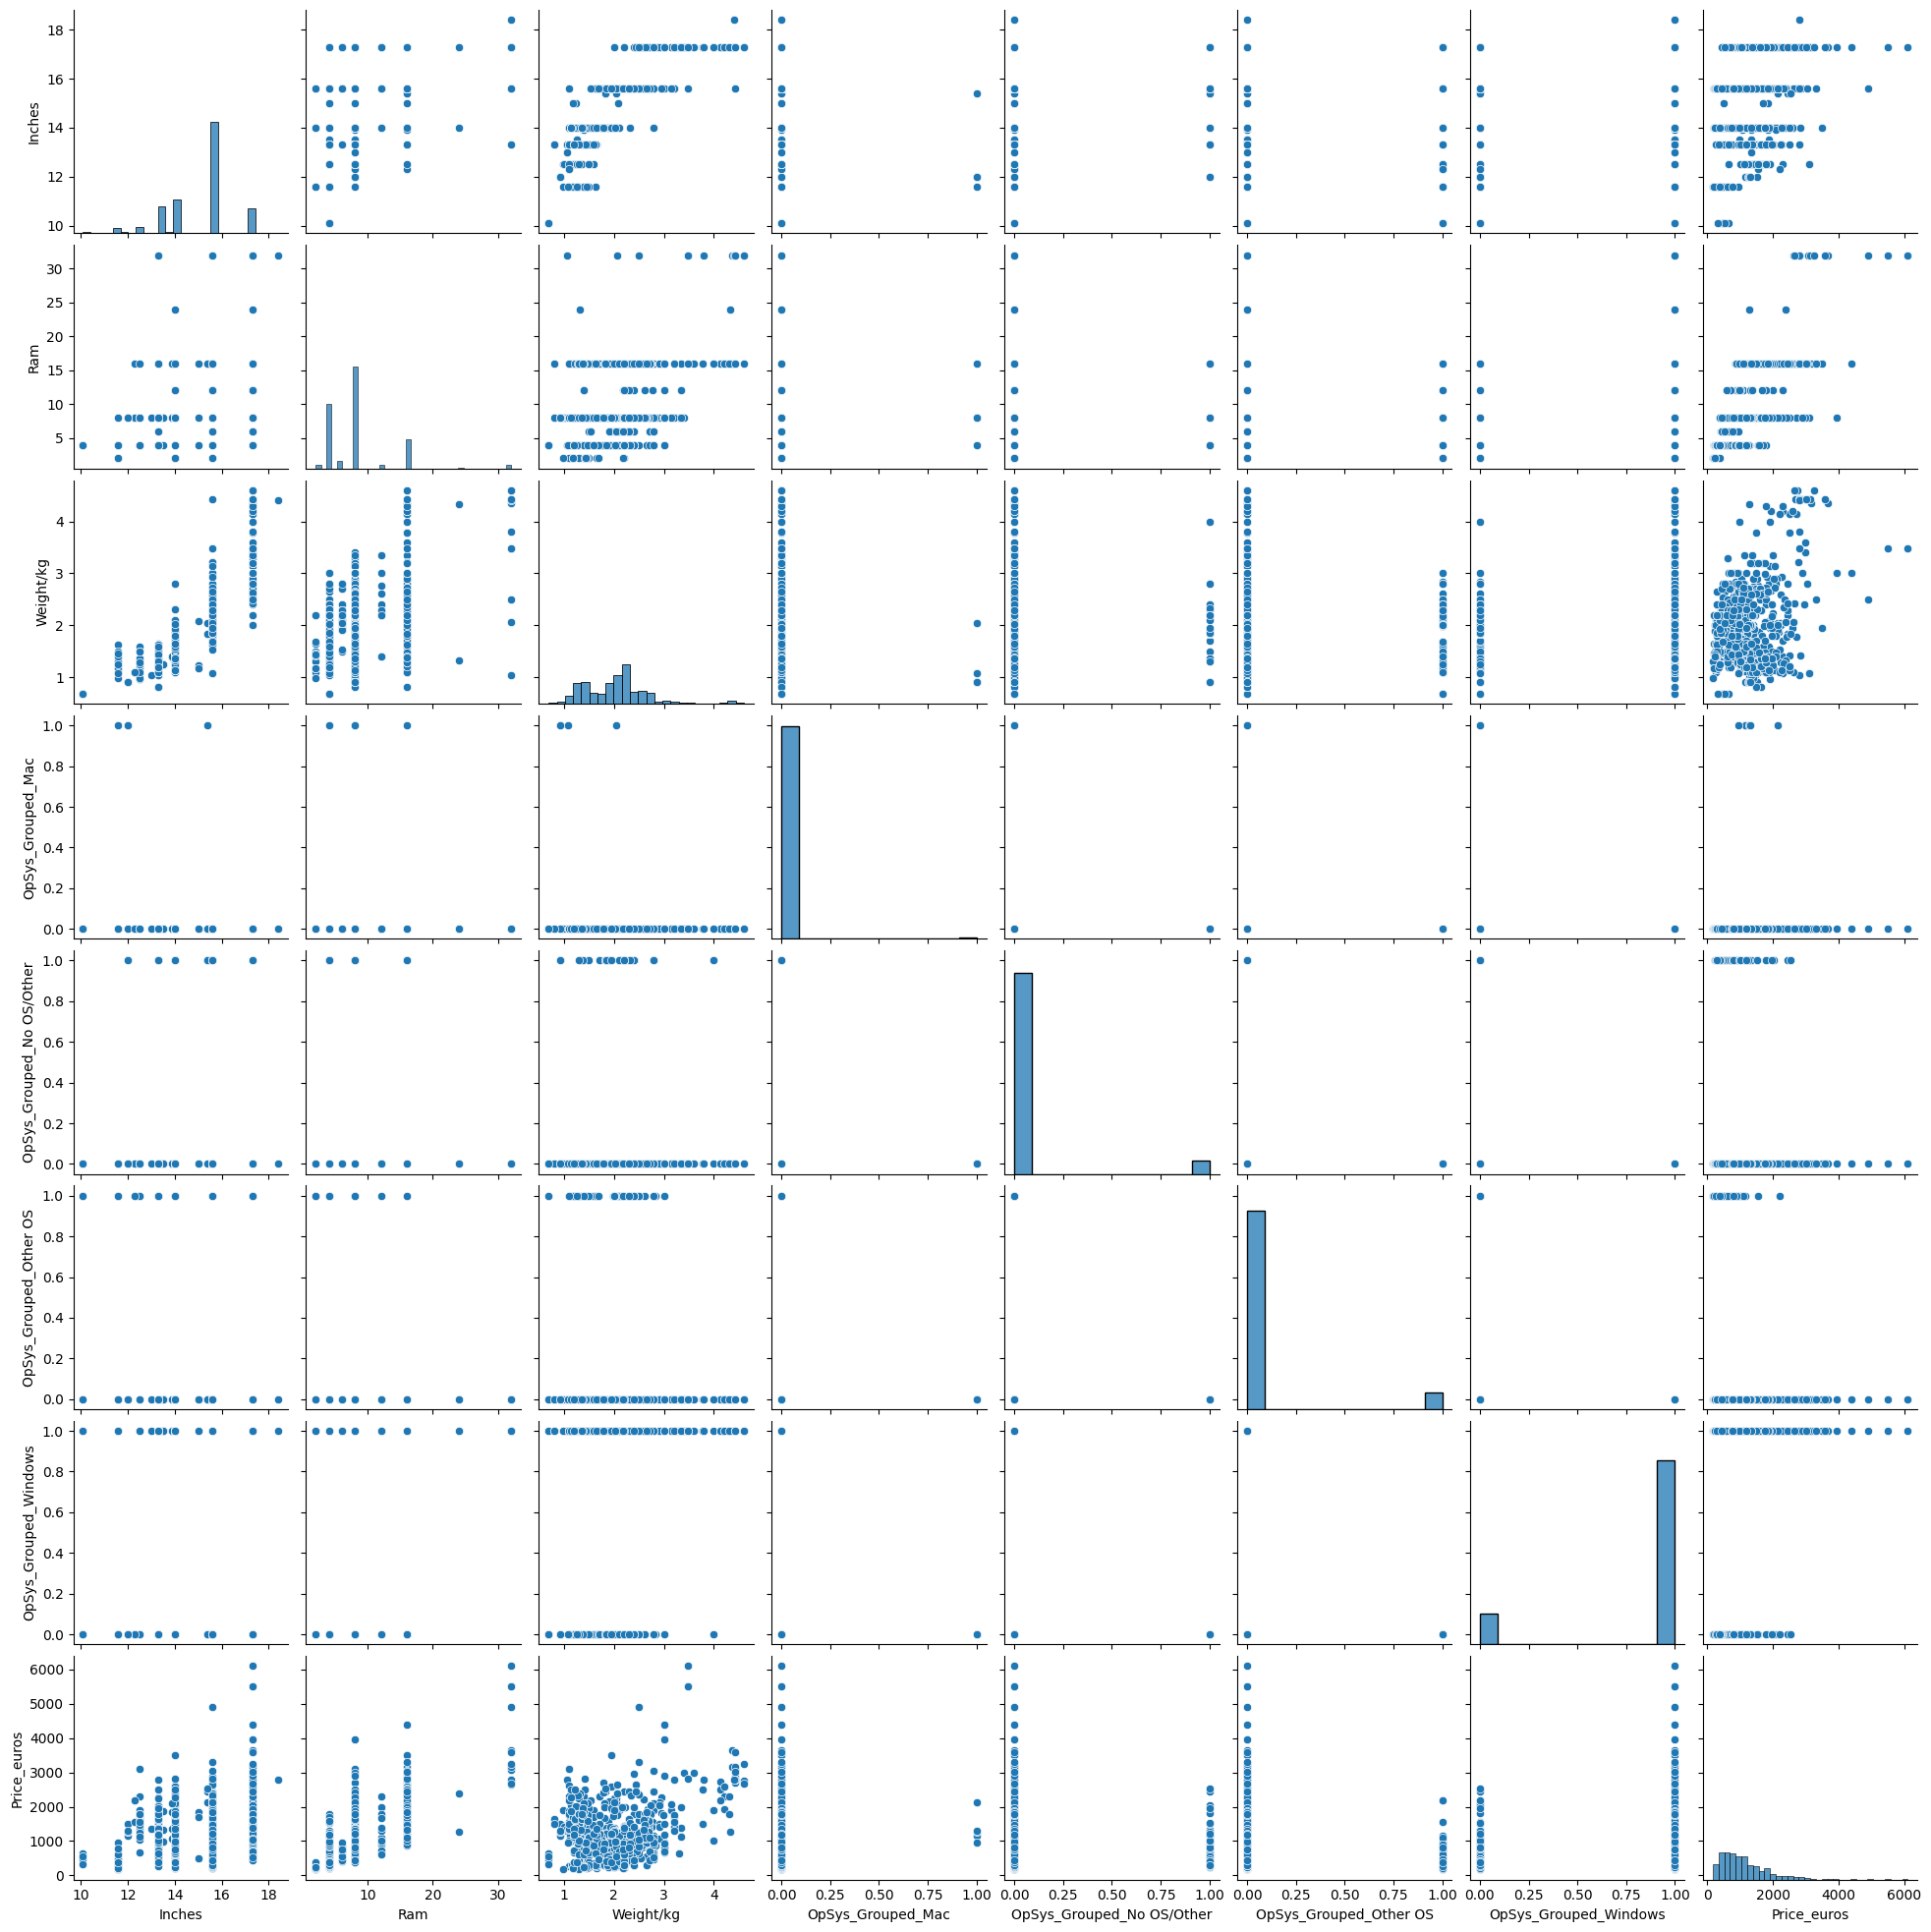

In [17]:
sns.pairplot(df_encoded[['Inches', 'Ram', 'Weight/kg', 'OpSys_Grouped_Mac', 'OpSys_Grouped_No OS/Other', 'OpSys_Grouped_Other OS', 'OpSys_Grouped_Windows', 'Price_euros']]);

In [19]:
matrix_corr = df_encoded.corr(numeric_only=True)

-----------------------------------------------------------------------------------------------------------------

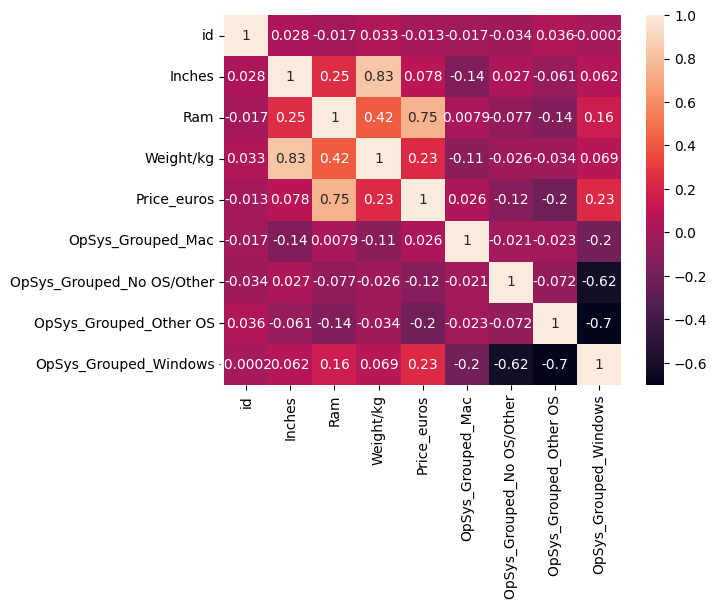

In [21]:
sns.heatmap(matrix_corr, annot=True);

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [138]:
sample = pd.read_csv('../data/sample_submission.csv')
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [148]:
# Preparar los datos
X = df_encoded[['Inches', 'Ram', 'Weight/kg', 'OpSys_Grouped_Mac', 'OpSys_Grouped_No OS/Other', 'OpSys_Grouped_Other OS', 'OpSys_Grouped_Windows']]
y = df_encoded['Price_euros']

In [141]:
X.shape

(391, 7)

In [142]:
y.shape

(391,)

In [133]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    int32  
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight/kg         391 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 38.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           391 non-null    int64  
 1   Price_euros  391 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [114]:
y.shape

(912,)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### 2. Dividir X_train, X_test, y_train, y_test

In [55]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)

### 3. Crear y entrenar el modelo


In [58]:
# print("Train features shape:", X_train.shape)
# print("Train target shape:", y_train.shape)
# print("Test features shape:", X_test.shape)
# print("Test target shape:", y_test.shape)

In [149]:
#creating LinearRegression Object
lm = LinearRegression()

In [150]:
#Training the Data Model
lm.fit(X, y)

LinearRegression()

In [154]:
# Preparar los datos
X_test = df_encoded_test[['Inches', 'Ram', 'Weight/kg', 'OpSys_Grouped_Mac', 'OpSys_Grouped_No OS/Other', 'OpSys_Grouped_Other OS', 'OpSys_Grouped_Windows']]
y_test = sample['Price_euros']

In [155]:
predictions2 = lm.predict(X_test)
predictions2

array([2091.91706518, 1087.52396517,  359.30339739, 1174.23555726,
       1217.44405989, 1958.58006322, 2060.66773787,  352.89669632,
       7134.68274043, 1174.02200056, 1217.01694649,  642.59942124,
        779.99400054,  740.20240515,  449.68481079, 1341.26302174,
        887.46110782, 1220.43385372, 1218.08473   , 1213.60003925,
       1448.47263905, 1213.60003925, 1962.85119726, 1214.66782276,
       1868.19749211, 1064.36575343, 1083.03927442,  642.59942124,
        995.00582704,  649.43323571, 1218.7254001 , 1175.08978407,
       1954.30892917,  887.34842684,  649.86034912, 1870.33305913,
       1087.52396517, 1085.38839814, 3651.31257503, 1087.52396517,
        647.7247821 , 1076.84613006, 1219.79318361, 1858.16032711,
       1081.1172641 , 1230.59256393,  448.61702728, 3657.2921627 ,
        449.68481079, 1217.44405989, 1089.65953219,  984.32799193,
       1081.1172641 ,  355.03226334, 1223.42364755,  782.98379437,
        781.91601086,  519.23503011, 1172.74066035, 1087.52396

In [151]:
predictions = lm.predict(X)
predictions

array([1090.9408724 ,  645.58921507, 1214.45426606, 2010.26078514,
       1267.31333535, 1526.46892143,  350.7611293 , 1091.79509921,
       1171.45932013, 1969.25789833,  659.47040072, 1083.67994453,
       1087.52396517,  863.35323959,  743.40575568, 1080.6901507 ,
        743.19219898,  869.33282725, 3719.91236252,  995.00582704,
        972.21017453,  769.98087465, 1267.31333535, 1877.80754371,
       1078.55458367,  350.7611293 ,  654.13148316,  872.96329118,
        649.86034912, 1185.34050578, 1086.02906825, 1093.93066623,
       1090.08664559,  649.43323571,  355.03226334,  868.69215714,
        649.86034912,  649.86034912,  352.89669632, 1076.84613006,
       1087.52396517, 1089.65953219, 1081.3308208 , 1089.87308889,
       1033.49998863, 1175.30334077,  651.99591614,  449.68481079,
       1969.10483583,  738.92106494,  642.59942124, 1080.6901507 ,
        787.99763194,  647.7247821 ,  651.99591614, 1175.08978407,
        742.33797217, 1089.65953219,  517.09946308, 1097.56113

In [130]:
X = df_encoded_test[['Inches', 'Ram', 'Weight/kg', 'OpSys_Grouped_Mac', 'OpSys_Grouped_No OS/Other', 'OpSys_Grouped_Other OS', 'OpSys_Grouped_Windows']]
y = predictions

In [156]:
from sklearn import metrics

lm.score(X_test, y_test)

-0.7199072503711776

In [122]:
X.shape

(391, 7)

In [123]:
y.shape

(391,)

In [157]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))

MAE: 627.4886561492447


In [131]:
# Ahora voy a escalarlo
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X)

# Crear y entrenar el modelo de regresión lineal
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y)
# Hacer predicciones con los datos de prueba escalados
predictions_scaled = lm_scaled.predict(X_test_scaled)

# Evaluar el modelo
print('MAE:', mean_absolute_error(y, predictions_scaled))

MAE: 352.34612801552686


In [39]:
score_scaled = lm_scaled.score(X_test_scaled, y_test)
print("Coeficiente de determinación (R^2) en datos escalados:", score_scaled)

Coeficiente de determinación (R^2) en datos escalados: 0.5482726428680362


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

In [ ]:
prediction = model.predict(X_pred)
prediction

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
predictions = model.predict(X_pred)
predictions

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [40]:
sample = pd.read_csv("../data/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [41]:
sample.head()

,id,Price_euros
0,1014,752.0
1,845,499.0
2,1151,1747.0
3,1265,245.0
4,573,1179.0


In [45]:
sample['Price_euros'].shape

(391,)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [75]:
predictions_scaled.shape

(912,)

In [76]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         912 non-null    int64  
 1   Company                    912 non-null    object 
 2   Product                    912 non-null    object 
 3   Inches                     912 non-null    float64
 4   ScreenResolution           912 non-null    object 
 5   Cpu                        912 non-null    object 
 6   Ram                        912 non-null    int32  
 7   Memory                     912 non-null    object 
 8   Gpu                        912 non-null    object 
 9   OpSys                      912 non-null    object 
 10  Weight/kg                  912 non-null    float64
 11  Price_euros                912 non-null    float64
 12  OpSys_Grouped_Mac          912 non-null    bool   
 13  OpSys_Grouped_No OS/Other  912 non-null    bool   

In [74]:
predictions.shape

(912,)

In [180]:
dicccionario = {'id':df_encoded_test['id'].values,"Price_euros": predictions2}

In [181]:
df = pd.DataFrame(dicccionario)

In [167]:
df.to_csv('submision.csv', index=False)

In [182]:
df

,id,Price_euros
0,181,2091.917065
1,708,1087.523965
2,862,359.303397
3,1064,1174.235557
4,702,1217.444060
...,...,...
386,1281,891.619561
387,524,1986.555991
388,1015,444.559450
389,1236,647.724782


In [169]:
df.columns.all()

'Price_euros'

In [171]:
sample.columns.all()

'Price_euros'

In [173]:
df.shape

(391, 2)

In [174]:
sample.shape

(391, 2)

In [183]:
df.id.all()

True

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [82]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [184]:
chequeator(df) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!


NameError: name 'submission' is not defined